In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# WEATHER PREDICTION

Our dataset uses daily weather measurements from 18 different European cities for which daily observations were available in the years 2000 to 2010.

These were Basel (Switzerland), Budapest (Hungary), Dresden, Düsseldorf, Kassel, and Munich (all in Germany), De Bilt and Maastricht (Netherlands), Heathrow (UK), Ljubljana (Slovenia), Malmo and Stockholm (Sweden), Montélimar, Perpignan, and Tours (France), Oslo (Norway), Rome (Italy), and Sonnblick (Austria).

In [2]:
data = pd.read_csv("./weather_prediction_dataset.csv")
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


For our study, we decided to use data from only one of these cities in the dataset.
We chose Munich because it was the city with the most features in the dataset.

Therefore, we removed all columns related to the other cities and kept those related to Munich and those identifying day and month

In [3]:
columns_to_keep = ['DATE', 'MONTH'] + [col for col in data.columns if 'MUENCHEN' in col.upper()]
df = data[columns_to_keep]

data_copy = df.copy()


# Modify column names
for col in data_copy.columns[2:]:
    new_col_name = col.replace('MUENCHEN_', '')
    data_copy.rename(columns={col: new_col_name}, inplace=True)
df = data_copy
df.head()


,DATE,MONTH,cloud_cover,wind_speed,wind_gust,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
0,20000101,1,8,2.6,9.4,0.91,1.0273,0.20,0.20,0.0,1.7,-0.5,2.6
1,20000102,1,6,2.1,8.2,0.90,1.0321,0.66,0.00,6.1,1.9,-0.2,5.8
2,20000103,1,7,2.1,6.9,0.92,1.0317,0.28,0.00,0.4,-0.4,-3.3,0.9
3,20000104,1,6,2.7,11.7,0.75,1.0260,0.58,0.04,4.5,3.8,-2.8,6.6
4,20000105,1,5,3.3,13.2,0.87,1.0248,0.26,0.00,0.2,5.3,4.3,7.3


## CLEANING THE DATA

First we check if there is no missing data or set to null

In [4]:
missing_values = df.isnull().sum()
print("\nValori mancanti per colonna:")
print(missing_values)


Valori mancanti per colonna:
DATE                0
MONTH               0
cloud_cover         0
wind_speed          0
wind_gust           0
humidity            0
pressure            0
global_radiation    0
precipitation       0
sunshine            0
temp_mean           0
temp_min            0
temp_max            0
dtype: int64


And even if there are duplicate data rows

In [5]:
duplicate_values = df.duplicated().sum()
print("\nNumero di righe duplicate:", duplicate_values)


Numero di righe duplicate: 0


Once we have established that the data are in a correct form, we can move on to study them

## DATA ANALYSIS

In [23]:
print("rows and columns:" + str(df.shape))
print("columns: " + str(df.columns))

rows and columns:(3654, 13)
columns: Index(['DATE', 'MONTH', 'cloud_cover', 'wind_speed', 'wind_gust', 'humidity',
       'pressure', 'global_radiation', 'precipitation', 'sunshine',
       'temp_mean', 'temp_min', 'temp_max'],
      dtype='object')


Here is a brief explanation of the different columns in the dataset

| Feature (type)   | Column name 		| Description 		| Physical Unit 	|
|------------------|----------------------|-----------------------|-----------------|
| mean temperature | temp_mean  		| mean daily temperature| in 1 &#176;C  	|
| max temperature  | temp_max   		| max daily temperature | in 1 &#176;C  	|
| min temperature  | temp_min   		| min daily temperature | in 1 &#176;C  	|
| cloud_cover      | cloud_cover		| cloud cover           | oktas  		|
| global_radiation | global_radiation 	| global radiation      | in 100 W/m2  	|
| humidity         | humidity   		| humidity              | in 1 %  		|
| pressure         | pressure   		| pressure              | in 1000 hPa  	|
| precipitation    | precipitation 	| daily precipitation 	| in 10 mm  	|
| sunshine    	   | sunshine 		| sunshine hours  	| in 0.1 hours 	|
| wind_gust       | wind_gust  		| wind gust    		| in 1 m/s 		|
| wind_speed        | wind_speed 		| wind speed   		| in 1 m/s 		|


In [9]:
df.describe().style.background_gradient()

,DATE,MONTH,cloud_cover,wind_speed,wind_gust,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,20045678.754242,6.520799,5.226054,2.792255,9.769814,0.741946,1.017450,1.426429,0.261700,5.219814,10.051587,5.997126,14.540285
std,28742.871733,3.450083,2.318547,1.315428,4.291187,0.132932,0.008226,0.983942,0.599618,4.594811,7.903211,7.055925,9.170164
min,20000101.000000,1.000000,0.000000,0.700000,2.600000,0.200000,0.984000,0.190000,0.000000,0.000000,-12.900000,-16.400000,-9.900000
25%,20020702.250000,4.000000,4.000000,1.900000,6.600000,0.650000,1.012600,0.580000,0.000000,0.700000,3.900000,0.600000,7.300000
50%,20045666.000000,7.000000,6.000000,2.500000,8.700000,0.750000,1.017200,1.150000,0.010000,4.400000,10.400000,6.300000,14.800000
75%,20070702.750000,10.000000,7.000000,3.300000,11.900000,0.840000,1.022500,2.230000,0.280000,8.900000,16.300000,11.675000,21.875000
max,20100101.000000,12.000000,8.000000,10.400000,30.900000,1.000000,1.044000,3.650000,9.790000,15.700000,29.200000,22.000000,37.000000


Now we study the correlation to see which features affect other

<Axes: >

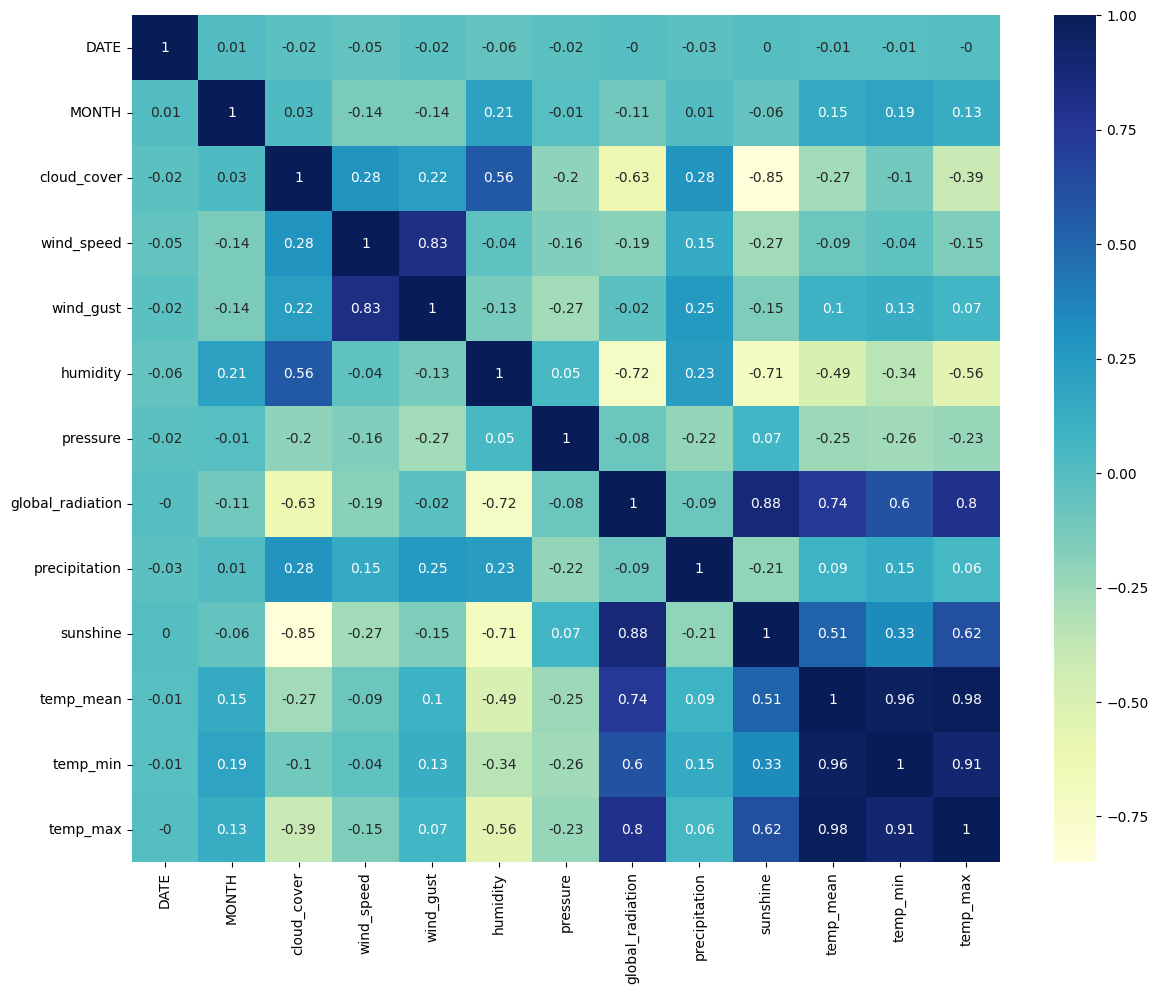

In [10]:
df.corr().style.background_gradient(cmap="Blues")
corr_matrix = np.round(df.corr(), 2)
plt.figure(figsize=(14,11))
sns.heatmap(
    corr_matrix,
    cmap="YlGnBu",
    annot=True,
)

From the correlation study we can see how some features in the dataset are in close contact with each other.
For example:
- Cloud cover with humidity and with precipitation and wind speed
- As cloud cover increases, sunshine and global radiation clearly decrease
- Humidity and precipitation
- as humidity increases, sunshine, global radiation and maximum temperatures decrease
- sunshine and global radiation are highly correlated
- temperatures depend on many different features

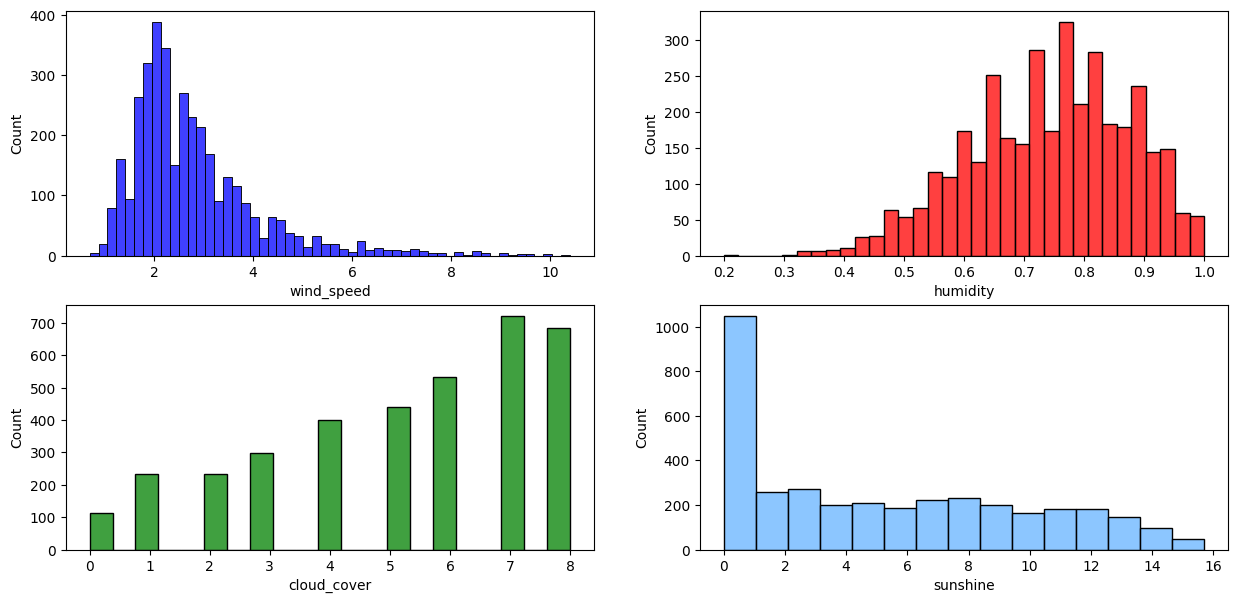

In [11]:
fig, axs = plt.subplots(2,2, figsize=(15,7))
axs = axs.flatten()
sns.histplot(df['wind_speed'],color='blue',ax=axs[0])
sns.histplot(df['humidity'],color='red',ax=axs[1])
sns.histplot(df['cloud_cover'],color='green',ax=axs[2])
sns.histplot(df['sunshine'],color='#66b3ff',ax=axs[3])
plt.show()

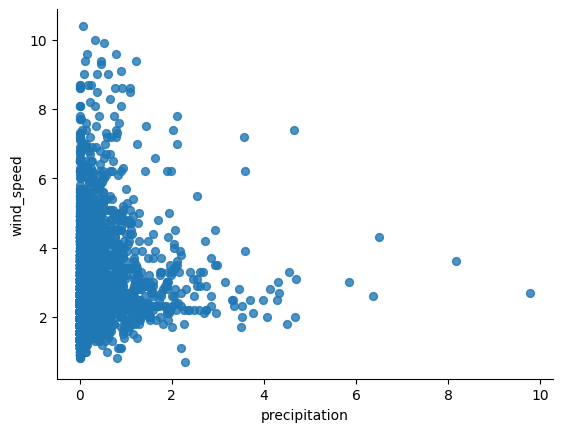

In [15]:
df.plot(kind='scatter', x='precipitation', y='wind_speed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## MACHINE LEARNING


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    roc_auc_score,
)

In [ ]:
testdata = data.drop(columns="date")
testdata["its_raining"] = testdata['weather'].isin(['rain', 'snow']).astype(int)
testdata = testdata.drop(columns="weather")

testdata.head()

,precipitation,temp_max,temp_min,wind,its_raining
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,1
2,0.8,11.7,7.2,2.3,1
3,20.3,12.2,5.6,4.7,1
4,1.3,8.9,2.8,6.1,1


In [ ]:
y = testdata["its_raining"]
x = testdata.drop(columns="its_raining")

rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(testdata, y)

x_rus.head()

,precipitation,temp_max,temp_min,wind,its_raining
0,0.0,32.8,16.7,2.1,0
1,0.0,12.8,7.2,2.6,0
2,0.0,27.8,13.3,2.9,0
3,0.0,18.3,11.1,2.1,0
4,0.0,21.1,14.4,2.9,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_rus, y_rus, test_size=0.2, random_state=42
)

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", lr.score(x_test, y_test))

Logistic Regression Accuracy:  1.0


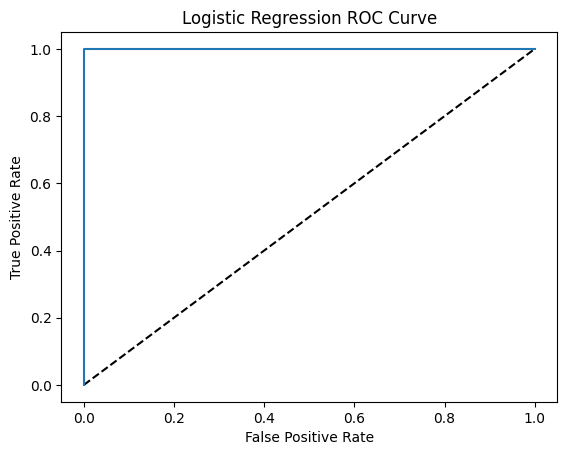

In [ ]:
# Probabilities
pred = lr.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, pred[:, 1])
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
#print(f"KNN Score: {knn.score(x_test, y_test)}")
print("KNN F1 Score: ", f1_score(y_test, prediction, average=None))


test_accuracy=accuracy_score(y_test,prediction)*100
print("Accuracy for our testing dataset without tuning is : {:.2f}%".format(test_accuracy) )
# print("KNN R2 Score: ", r2_score(y_test, knn.predict(x_test)))

KNN F1 Score:  [0.95238095 0.94166667]
Accuracy for our testing dataset without tuning is : 94.76%


Text(0.5, 1.0, 'Confusion matrix pre tuning')

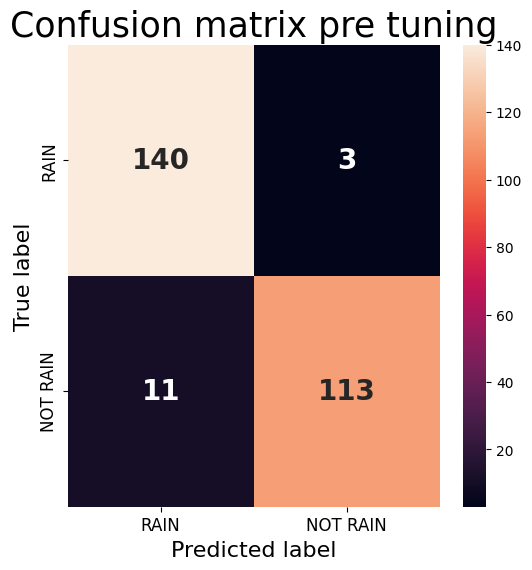

In [ ]:
_, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(
    confusion_matrix(y_test, prediction),
    annot=True,
    fmt="d",
    annot_kws={"size": 20, "weight": "bold"},
)
labels = ["RAIN", "NOT RAIN"]
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels(labels, fontsize=12)
ax.set_ylabel("True label", fontsize=16)
ax.set_xlabel("Predicted label", fontsize=16)
ax.set_title("Confusion matrix pre tuning", fontsize=25)

In [ ]:
params = {
    'n_neighbors' : [7,9,11,13,15, 22],
    'metric' : ['minkowski','euclidean','manhattan'],
    'weights': ['uniform', 'distance'],
}


knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=False, verbose=1) #cv=10 è altino
grid.fit(x_train, y_train)

print("Best estimator:", grid.best_estimator_)
print("Optimized hyperparameters: ", grid.best_params_)
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(grid.best_score_*100))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
Optimized hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy for our testing dataset with tuning is : 96.53%


In [ ]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=22)
knn.fit(x_test, y_test)
prediction=knn.predict(x_test)
test_accuracy=accuracy_score(y_test,prediction)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 92.51%


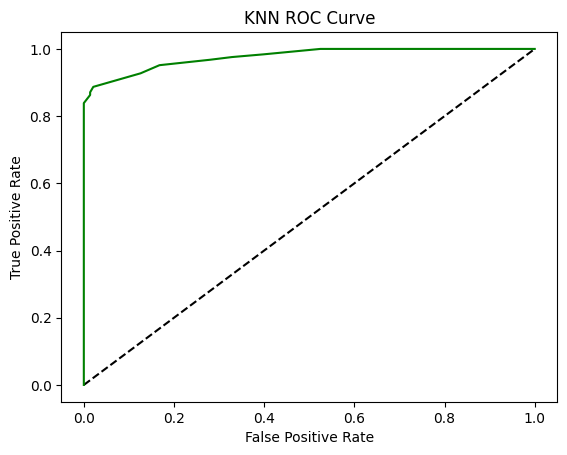

In [ ]:
pred = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, pred[:, 1])
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="KNN", color="g")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.show()

Text(0.5, 1.0, 'Confusion matrix post tuning')

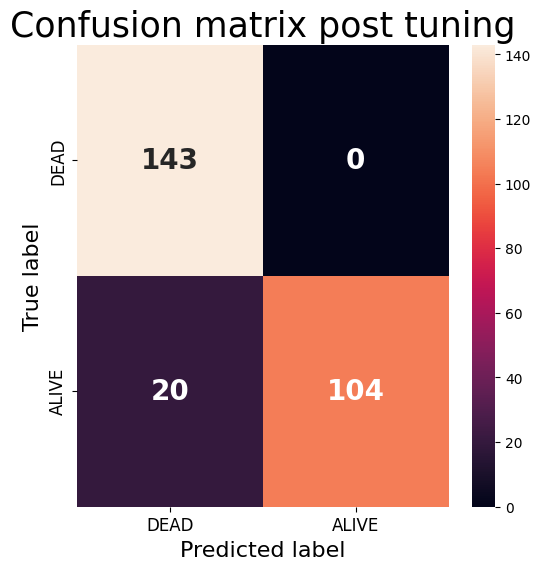

In [ ]:
_, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(
    confusion_matrix(y_test, prediction),
    annot=True,
    fmt="d",
    annot_kws={"size": 20, "weight": "bold"},
)

labels = ["DEAD", "ALIVE"]
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels(labels, fontsize=12)
ax.set_ylabel("True label", fontsize=16)
ax.set_xlabel("Predicted label", fontsize=16)
ax.set_title("Confusion matrix post tuning", fontsize=25)